In [1]:
import numpy as np
from classfunctions import NbodyClass
import matplotlib.pyplot as mpl
from mpl_toolkits.mplot3d import Axes3D

In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplo

### Part 3: Large n

This script scatters many particles randomly through a domain and watches as time passes. Both the periodic and nonperiodic case are considered.

ffmpeg -i nbodystep%02d.jpg test1.gif

#### Periodic case

In the periodic case we should see the mass clump slightly into smaller regions, but not be drawn completely together, since it's recieving equal draw from all directions.

The only catch: my energy simply increases.
Output files here for this case:
Gif displayed below.

<!-- ![SegmentLocal](part3PeriodicOutputs/grid50step20soften4/grid50step20soften4periodic.gif "segment") -->
<img src="part3PeriodicOutputs/grid50step20soften4/grid50step20soften4periodic.gif" width="800" height="800"/>

#### Non - periodic case.

In the non-periodic case we should see all of the particles eventually clumping in the inside of the area, as they will be drawn together by gravity. Note that some of the particles might gain a large velocity and be lost out of the frame.

Output images and gif located here:


In [2]:
outdir = "part3PeriodicOutputs/"

num_part = 10**5
spread=50
periodic = True

pos = spread*np.random.rand(3, num_part)
v = np.random.rand(3, num_part)
nbody = NbodyClass(pos, v, outdir=outdir, sgrid=spread, periodic=periodic, gradient=True)
nbody.calculate_potential(DEBUG=False)

n = 20
nbody.take_n_steps(n, plots=True, plot_every=1)

20

In [5]:
print('Run specs: ')
# print('Periodic: ', periodic)
print('Periodic: True')
print('Grid cells: ', spread)
print('Number of particles: ', num_part)
print('Number of steps: ', n)
print('Softening: ', 4)

Run specs: 
Periodic: True
Grid cells:  50
Number of particles:  100000
Number of steps:  20
Softening:  4


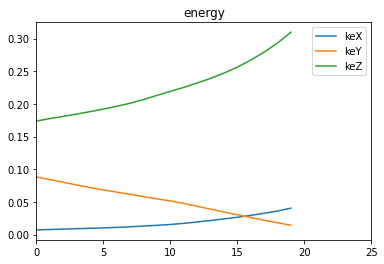

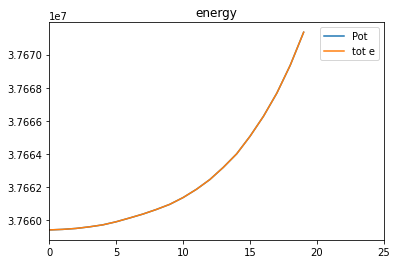

In [7]:
#plot the energy, see how well it's conserved
# nbody.plot_energy()
lims = 25

mpl.figure()
# mpl.plot(range(0, n), nbody.pe[:n])
mpl.plot(range(0, n), nbody.ke[0, :n])
mpl.plot(range(0, n), nbody.ke[1, :n])
mpl.plot(range(0, n), nbody.ke[2, :n])
# mpl.plot(range(0, n), nbody.pe[:n] + np.sum(nbody.ke, axis=0)[:n])
mpl.legend(['keX', 'keY', 'keZ'])
mpl.title('energy')
mpl.xlim([0, lims])
mpl.show()

mpl.figure()
mpl.plot(range(0, n), nbody.pe[:n])
# mpl.plot(range(0, n), nbody.ke[0, :n])
# mpl.plot(range(0, n), nbody.ke[1, :n])
# mpl.plot(range(0, n), nbody.ke[2, :n])
mpl.plot(range(0, n), nbody.pe[:n] + np.sum(nbody.ke, axis=0)[:n])
mpl.legend(['Pot', 'tot e'])
# mpl.legend(['Pot', 'keX', 'keY', 'keZ', 'tot e'])
mpl.xlim([0, lims])
mpl.title('energy')
mpl.show()

np.save(outdir + 'kinen', nbody.ke)
np.save(outdir + 'poten', nbody.pe)